## GRIP : The Sparks foundation Data Science and Business Analytics internship
## Creator : Munj Bhavesh Patel
## Task 3: SampleSuperstore dataset EDA

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import warnings
from random import sample
from scipy.stats import skew, kurtosis, norm

In [2]:
# Setting Parameters

plt.rcParams['figure.figsize'] = 10,10
warnings.filterwarnings('ignore')
sns.set_style(style = 'darkgrid')

In [3]:
df = pd.read_csv(r"C:\Users\Munj Patel\Desktop\INTERNSHIP\SPARKS_FOUNDATION\Project-3\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.describe(include=['O'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df = df.drop('Country',axis=1)

## EDA

In [11]:
(np.where(df['Profit'] < 0))[0]

array([   3,   14,   15, ..., 9931, 9937, 9962], dtype=int64)

In [12]:
df['Profit'][3]

-383.031

### Finding and dropping duplicate values:

In [13]:
df[df.duplicated() == True]

df = df.drop_duplicates()

In [14]:
df = df.reset_index(drop=True)
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9973,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9974,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9975,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Countplot of Categorical Varibales:

Most frequently occuring Ship Mode is Standard Class with frequency of 5955.
Least frequently occuring Ship Mode is Same Day with frequency of 542.


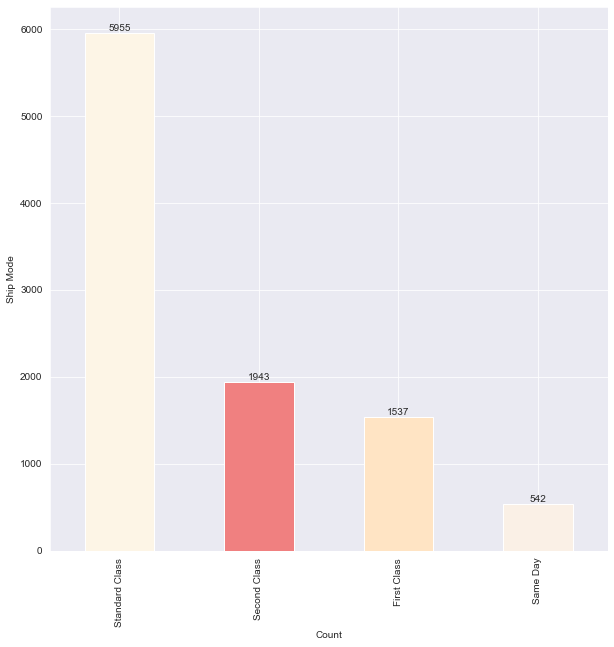

Most frequently occuring Segment is Consumer with frequency of 5183.
Least frequently occuring Segment is Home Office with frequency of 1779.


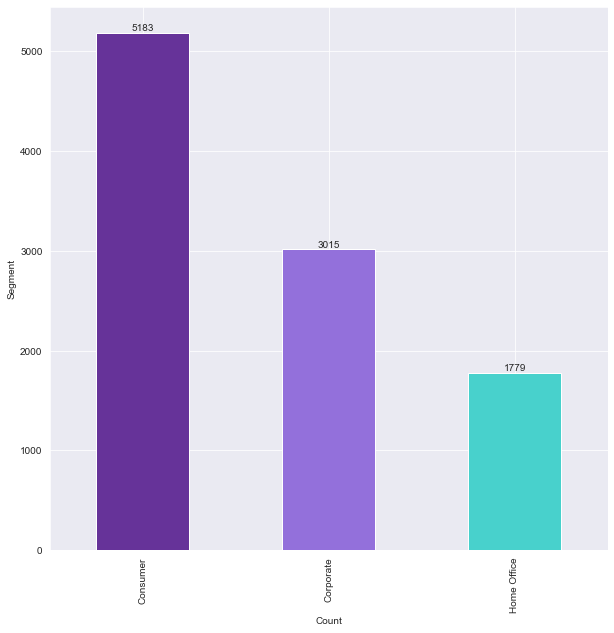

Most frequently occuring State is California with frequency of 1996.
Least frequently occuring State is Wyoming with frequency of 1.


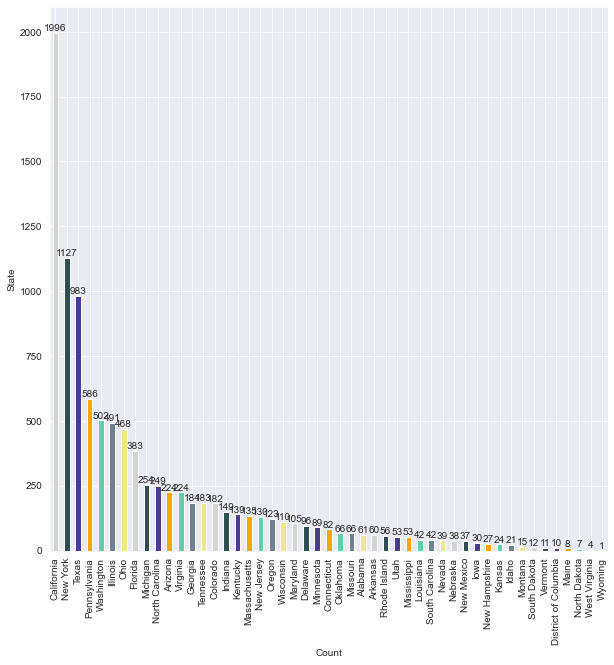

Most frequently occuring Region is West with frequency of 3193.
Least frequently occuring Region is South with frequency of 1620.


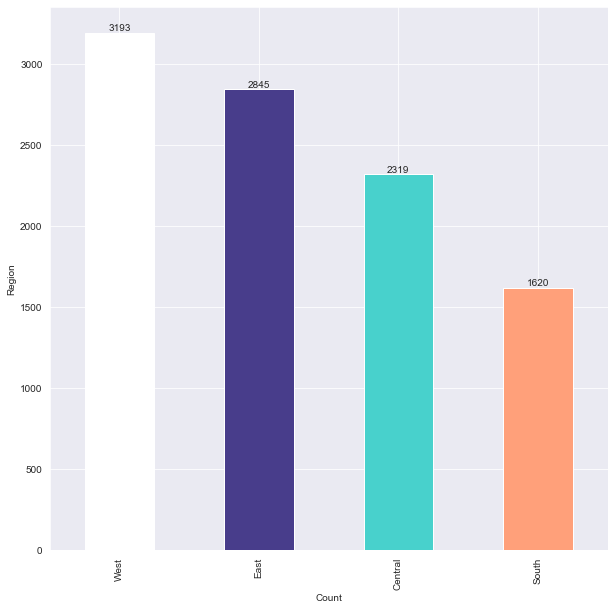

Most frequently occuring Category is Office Supplies with frequency of 6012.
Least frequently occuring Category is Technology with frequency of 1847.


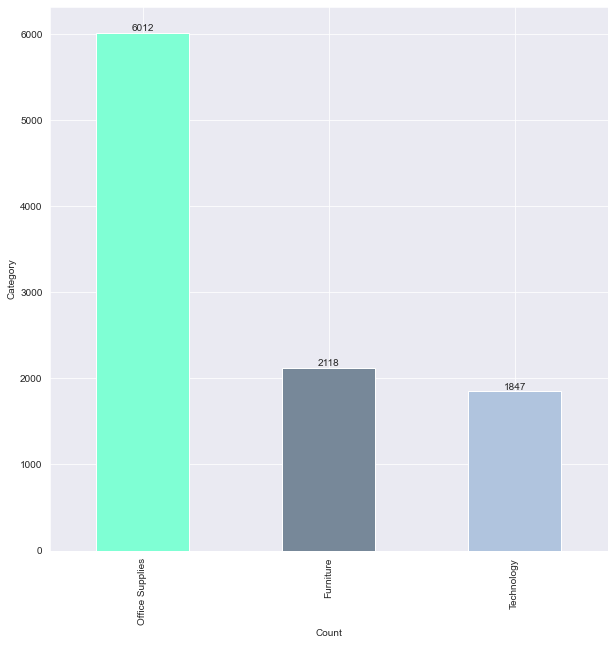

Most frequently occuring Sub-Category is Binders with frequency of 1522.
Least frequently occuring Sub-Category is Copiers with frequency of 68.


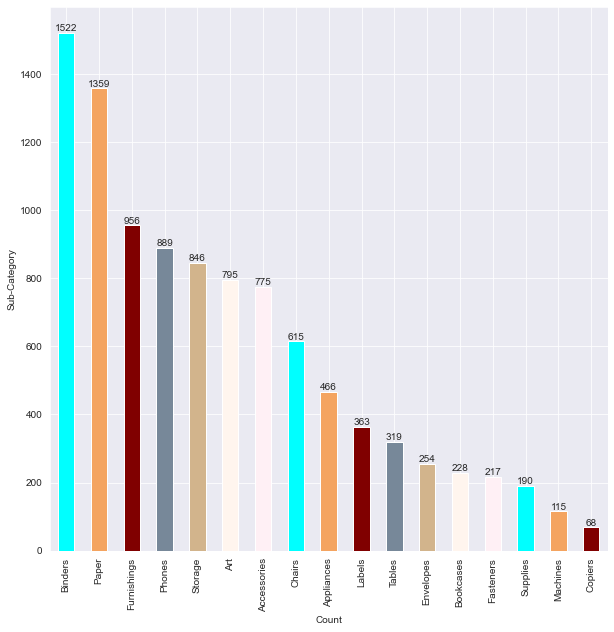

Most frequently occuring Quantity is 3 with frequency of 2400.
Least frequently occuring Quantity is 12 with frequency of 23.


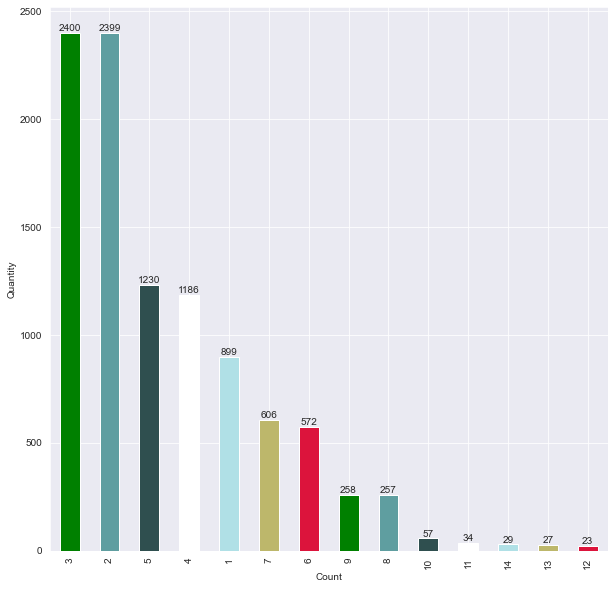

Most frequently occuring Discount is 0.0 with frequency of 4787.
Least frequently occuring Discount is 0.45 with frequency of 11.


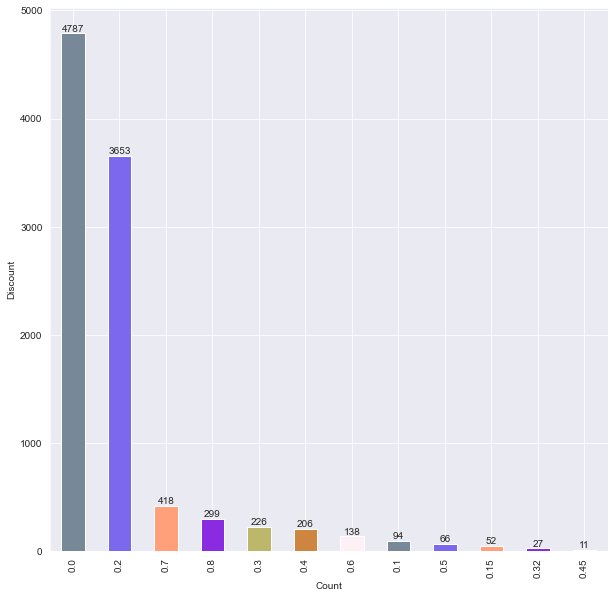

In [15]:
l_cat = ['Ship Mode', 'Segment','State', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount']

for i in l_cat:
    
#     plt.figure(figsize=(15,15))
    
    c = sample([k for k,v in pltc.cnames.items()], len(dict(df.dtypes[df.dtypes == 'object']).keys()))
    
    ax = df[i].value_counts().plot(kind='bar',color=c)
    
    for j in ax.containers:
        ax.bar_label(j)
        
    print(f'Most frequently occuring {i} is {list(dict(df[i].value_counts()).keys())[0]} with frequency of {list(dict(df[i].value_counts()).values())[0]}.')
    print(f'Least frequently occuring {i} is {list(dict(df[i].value_counts()).keys())[-1]} with frequency of {list(dict(df[i].value_counts()).values())[-1]}.')
    
    plt.xlabel('Count')
    plt.ylabel(i)
    plt.show()

### Skewness and Kurtosis of Profit and Sales

Skewness of Profit is 7.553612587758595.
Kurtosis of Profit is 396.3166999215224.


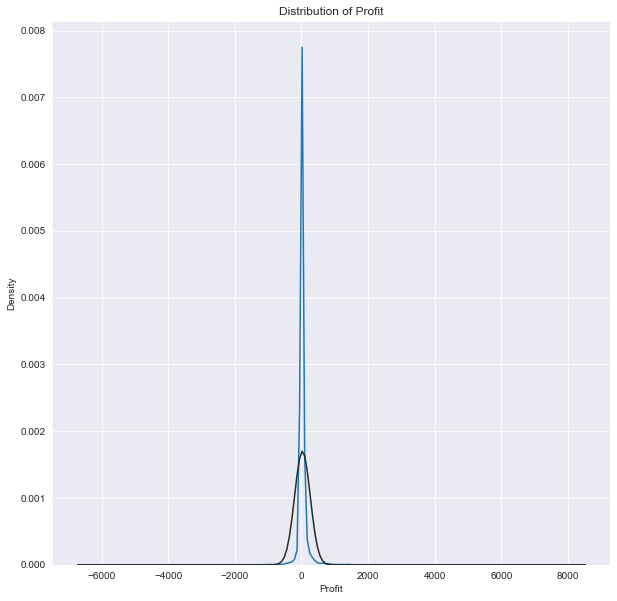

Skewness of Sales is 12.961821201923838.
Kurtosis of Sales is 304.71757333698366.


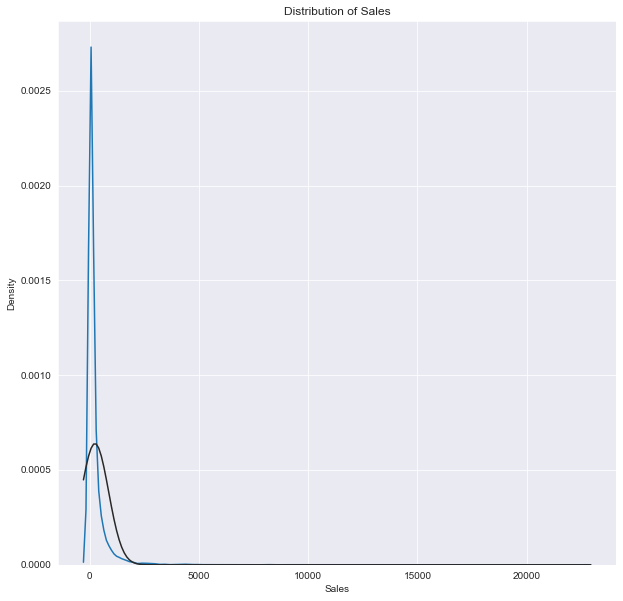

In [16]:
for t in ['Profit', 'Sales']:
    
    sns.distplot(df[t], fit = norm, hist = False)
    
    print(f'Skewness of {t} is {skew(df[t])}.')
    plt.title(f'Distribution of {t}')
    print(f'Kurtosis of {t} is {kurtosis(df[t])}.')
    
    plt.show()


#### The above graph shows there are many records for which the total profit is 0. However, there is also a large amount of data for which the Profit is both > 0 and < 0.  Also, there are many records for which the overall sales is near to 0, hence the peak near 0. 

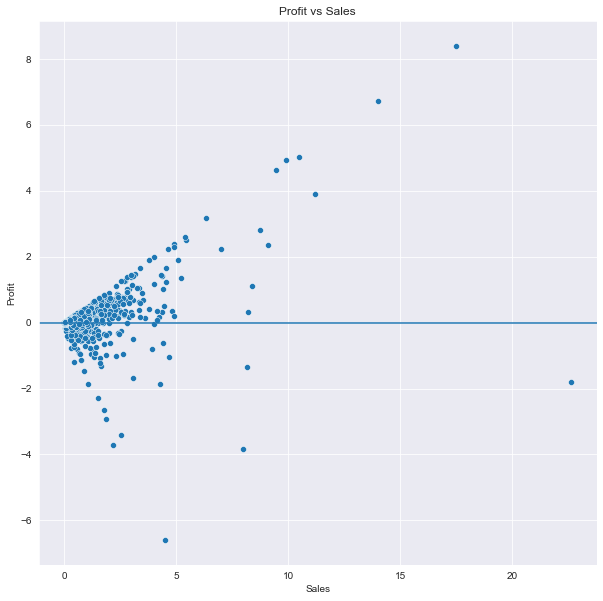

In [17]:
sns.scatterplot(df['Sales']/1000, df['Profit']/1000)
plt.title('Profit vs Sales')
plt.axhline()
plt.show()

#### The above graph shows the larger the sales the larger is the profit. However, there are some points for which even though sales > 0, the profit is still < 0. 

### Total profit vs loss

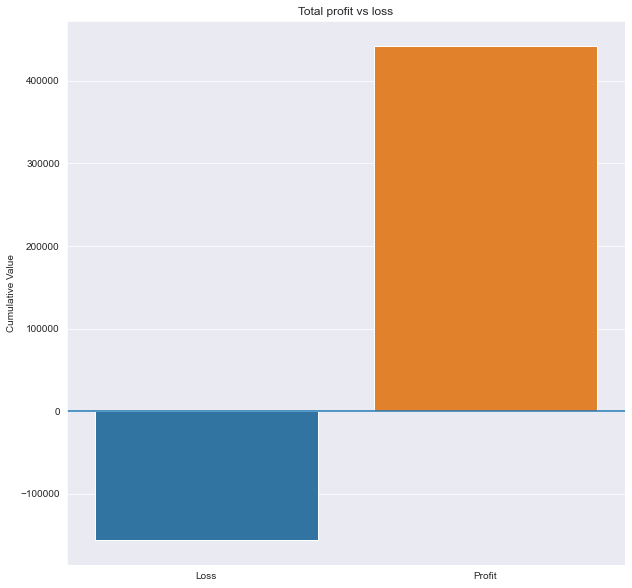

In [18]:
l_net_profit = [(df['Profit'].iloc[np.where(df['Profit'] < 0)].sum()), df['Profit'].iloc[np.where(df['Profit'] > 0)].sum()]

sns.barplot(x = ['Loss', 'Profit'], y = l_net_profit)
plt.title('Total profit vs loss')
plt.ylabel('Cumulative Value')
plt.axhline(y=0)
plt.show()

#### From above it is clear that in the given dataset the amount of profit is more compared to the loss.

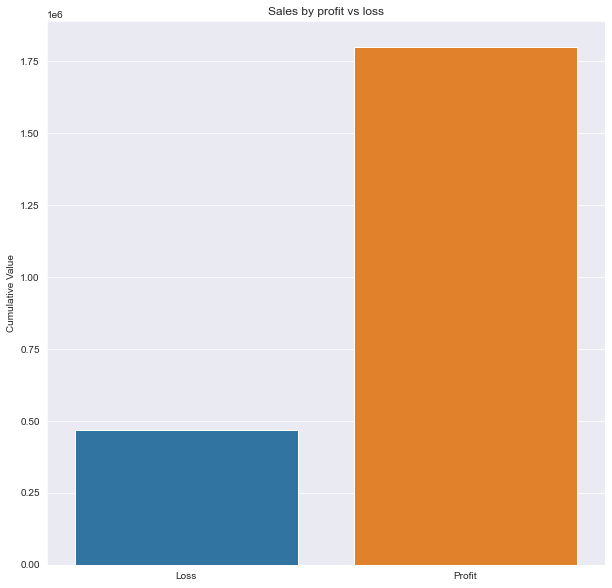

In [19]:
l_net_sales = [df.iloc[np.where(df['Profit'] < 0)]['Sales'].sum(), df.iloc[np.where(df['Profit'] > 0)]['Sales'].sum()]

sns.barplot(x = ['Loss', 'Profit'], y = l_net_sales)
plt.title('Sales by profit vs loss')
plt.ylabel('Cumulative Value')
plt.show()

#### As one might expect, from the above graph it is clear that the higher is the profit the higher is the sales. However, the "Loss" bar also indicates that there were many factors which lead to loss of profit even though the net sales were significantly large. the reason behind this will be visualized below graphically.

## Analysis of Sales and Profit by variable

### Defining function which combines "Profit" and "Sales" and shows a combined graph:

In [20]:
def get_net_profit_sales(c, df):
    
    df.groupby(c)[['Profit', 'Sales']].sum().plot(kind = 'bar')
    
    plt.ylabel('Profit and Sales')
    plt.xticks(rotation = 90)
    
    plt.title(f'Profit vs Sales by {c}')


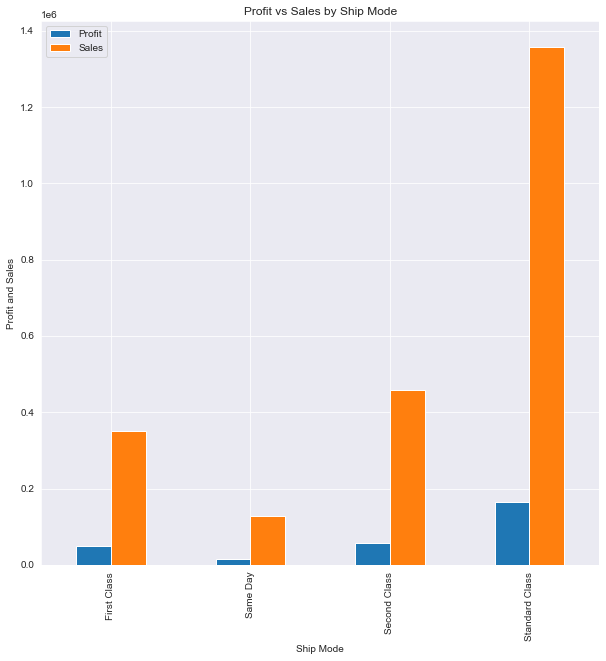

In [21]:
get_net_profit_sales(l_cat[0], df)

#### In case of "Ship Mode", the largest sales and profit is provided by "Standard Class", followed by "Second Class", "First Class" and "Same Day". 

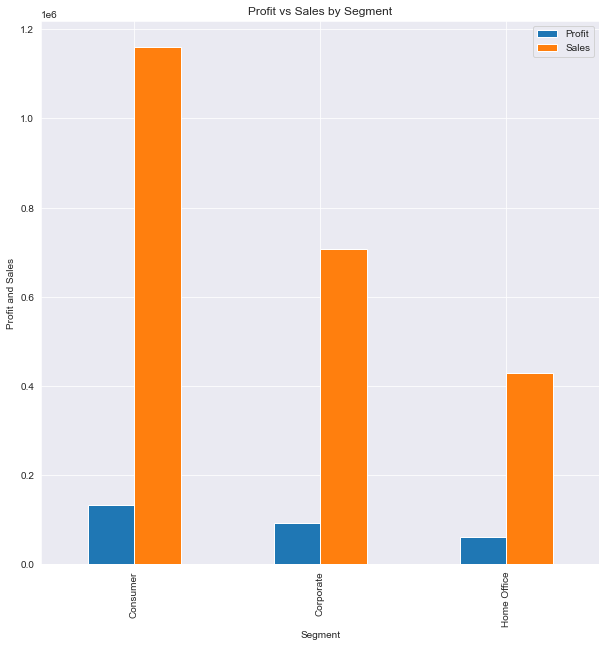

In [22]:
get_net_profit_sales(l_cat[1], df)

#### It is clear from above that "Consumer" followed by "Corporate" followed by "Home Office" provide the most sales and profits in "Segment".

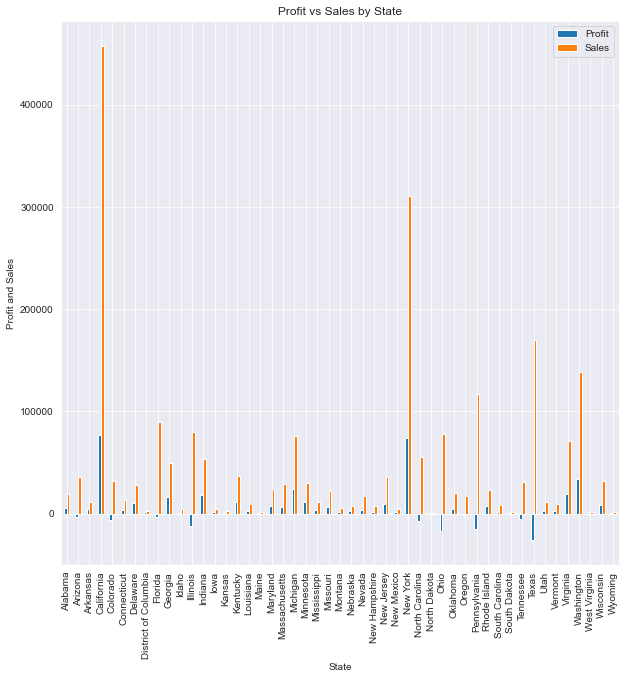

In [23]:
get_net_profit_sales(l_cat[2], df)

#### In terms of states, we see that "Ohio", "Pennsylvania" and "Texas" are top 3 states which yeild a cumulative loss even though the corresponding sales are greater than zero. As for the maximum profit, the top three states are "California", "New York" and "Washington".

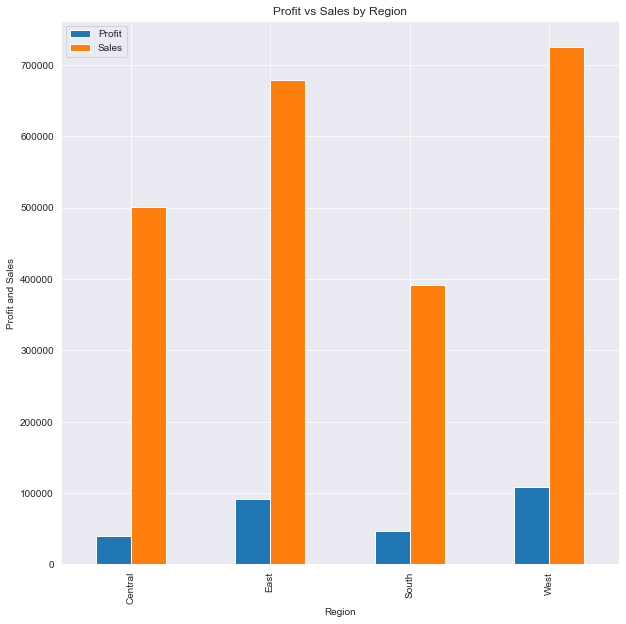

In [24]:
get_net_profit_sales(l_cat[3], df)

#### For profit and sales, "West" and "East" region perform great while on the other hand "Central" and "South" regions do not.

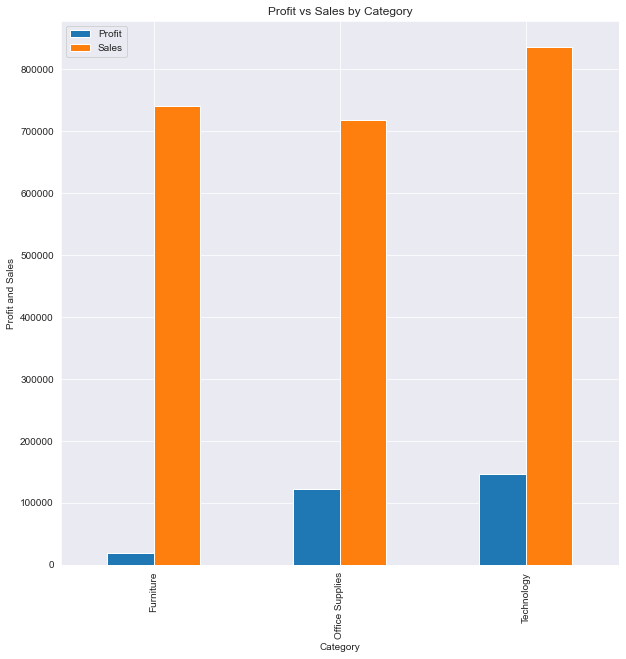

In [25]:
get_net_profit_sales(l_cat[4], df)

#### In "Category" section, most profit is provided by "Technology", followed by "Office Supply" and "Furniture". However, it is to note that the sales for "Furniture" is more compared to "Office Supplies" even though the profit profit it provides is less.

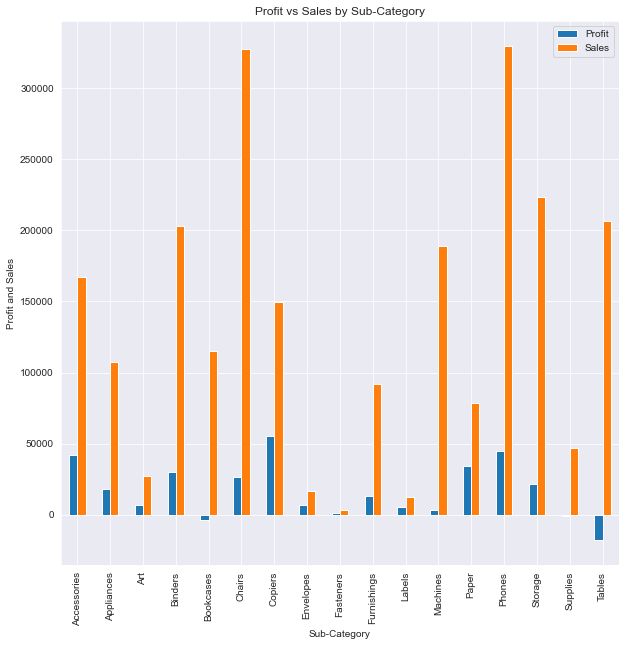

In [26]:
get_net_profit_sales(l_cat[5], df)

#### The sub-category of "Bookcases" and "Tables" lead to a effective loss even though the corresponding sale is quite large. The top 3 largest profits is provided by "Copies", "Phones" and "Accessories".

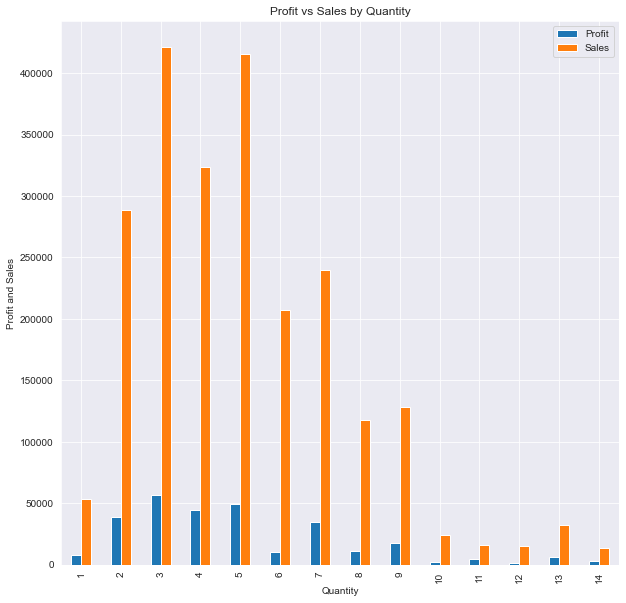

In [27]:
get_net_profit_sales(l_cat[6], df)

#### The top 3 profit and sales are provided by 3,4 and 5 quantity.

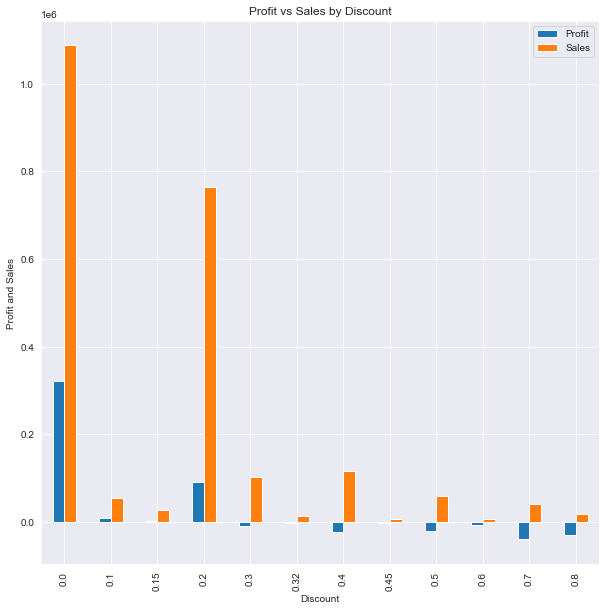

In [28]:
get_net_profit_sales(l_cat[7], df)

#### It is clear that discounts of 0.3, 0.4, 0.5, 0.6, 0.7 and 0.8 lead to a net loss. On the other hand, discounts of 0.15, 0.32 and 0.45 provide no significant profit. Highest profit is provided by discounts of 0, 0.2 and 0.1.

## Summary of results

### Therefore the business should focus more towards expanding it's foothold of customers in West and East regions in states such as New York and California while at the same time, it should find alternative ways to attract more profit in the Central and South regions in states such as Texas and Ohio. More focus and resources should be given towards the Consumer and Corporate segments. Also, high profit categories and sub-categories should be promoted with attractive discounts with Standard, First and Second class deliveries which will simultaneously increase the profits.